# MAVIS 数据集分析

这个notebook用于分析MAVIS数据集。该数据集包含数学图表的图像、对应的LaTeX代码和描述性文本。

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from io import BytesIO
from PIL import Image

# 设置数据集路径
DATASET_PATH = "/Users/jia/datasets/data/mavis/train"

print("正在检查数据集...")
if not os.path.exists(DATASET_PATH):
    print(f"错误: 数据集路径 {DATASET_PATH} 不存在")
else:
    print(f"数据集路径: {DATASET_PATH}")

正在检查数据集...
数据集路径: /Users/jia/datasets/data/mavis/train


In [2]:
# 列出所有数据文件
files = os.listdir(DATASET_PATH)
parquet_files = [f for f in files if f.endswith(".parquet")]

print(f"\n数据文件总数: {len(files)}")
print(f"Parquet文件数量: {len(parquet_files)}")
print(f"\n前10个文件:")
for file in parquet_files[:10]:
    print(f"  - {file}")


数据文件总数: 78
Parquet文件数量: 78

前10个文件:
  - train-00062-of-00078.parquet
  - train-00039-of-00078.parquet
  - train-00007-of-00078.parquet
  - train-00026-of-00078.parquet
  - train-00018-of-00078.parquet
  - train-00043-of-00078.parquet
  - train-00032-of-00078.parquet
  - train-00069-of-00078.parquet
  - train-00057-of-00078.parquet
  - train-00076-of-00078.parquet


In [3]:
# 加载第一个parquet文件
if parquet_files:
    first_file = os.path.join(DATASET_PATH, parquet_files[0])
    print(f"\n正在加载文件: {first_file}")
    df = pd.read_parquet(first_file)
    print(f"数据集形状: {df.shape}")
    print(f"列名: {list(df.columns)}")


正在加载文件: /Users/jia/datasets/data/mavis/train/train-00062-of-00078.parquet
数据集形状: (6579, 4)
列名: ['id', 'code', 'caption', 'image']


In [4]:
# 显示数据集基本信息
if 'df' in locals():
    print("\n数据集基本信息:")
    print(df.info())


数据集基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6579 entries, 0 to 6578
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       6579 non-null   object
 1   code     6579 non-null   object
 2   caption  6579 non-null   object
 3   image    6579 non-null   object
dtypes: object(4)
memory usage: 205.7+ KB
None


In [5]:
# 显示数据集前5行
if 'df' in locals():
    print("\n数据集前5行:")
    display(df.head())


数据集前5行:


,id,code,caption,image
0,mavis_98961,,"Firstly, outline a Rectangle ABCD. Secondly, e...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
1,mavis_51521,,A rectangle ABCD with AB measuring 12.0 and CB...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
2,mavis_44421,,A square ABCD with side lengths of 9.0 units h...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
3,mavis_5297,,A square ABCD with sides of length 10.0 units ...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
4,mavis_24310,,"The triangle has two sides of equal length, wi...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...


In [6]:
# 检查数据集中的缺失值
if 'df' in locals():
    print("\n缺失值统计:")
    print(df.isnull().sum())


缺失值统计:
id         0
code       0
caption    0
image      0
dtype: int64


In [13]:
import matplotlib.pyplot as plt
# 设置字体，使用你在步骤1中找到的字体名称，例如'Heiti TC'或'PingFang SC'
plt.rcParams['font.sans-serif'] = ['Heiti TC']  # 也可以尝试 'PingFang SC'
# 解决负号可能显示为方块的问题[citation:2][citation:6]
plt.rcParams['axes.unicode_minus'] = False


caption长度统计:
count    6579.000000
mean      340.912601
std       151.651481
min        25.000000
25%       245.000000
50%       326.000000
75%       424.000000
max       916.000000
Name: caption_length, dtype: float64


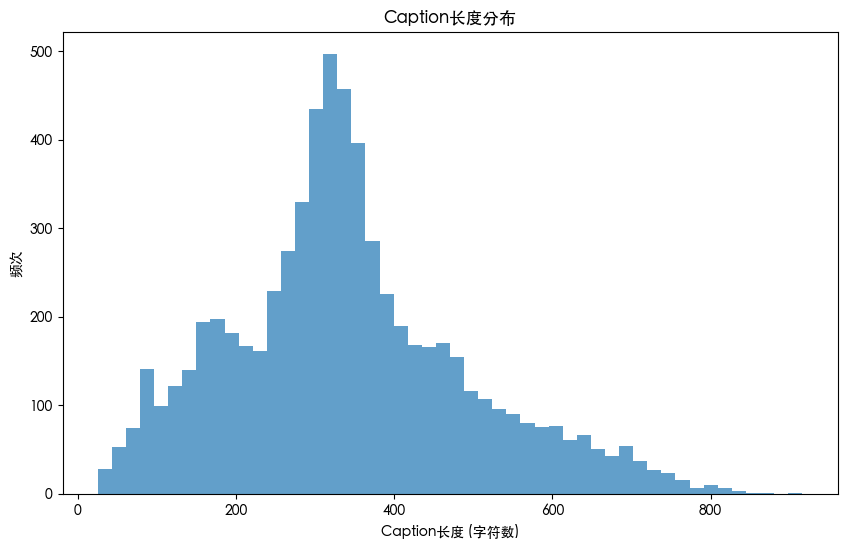

In [14]:
# 分析caption的长度
if 'df' in locals() and 'caption' in df.columns:
    df['caption_length'] = df['caption'].str.len()
    
    print("\ncaption长度统计:")
    print(df['caption_length'].describe())
    
    # 绘制caption长度分布直方图
    plt.figure(figsize=(10, 6))
    plt.hist(df['caption_length'], bins=50, alpha=0.7)
    plt.title('Caption长度分布')
    plt.xlabel('Caption长度 (字符数)')
    plt.ylabel('频次')
    plt.show()


code长度统计:
count    6579.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: code_length, dtype: float64


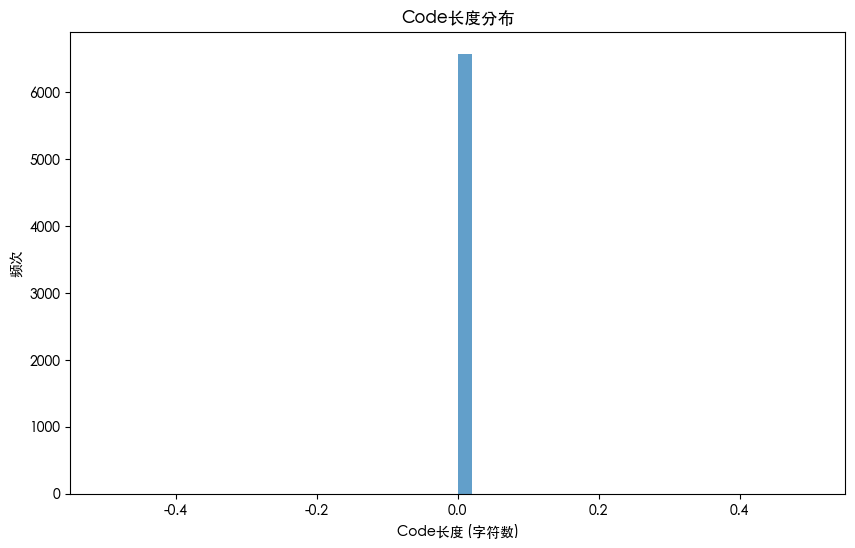

In [15]:
# 分析code的长度
if 'df' in locals() and 'code' in df.columns:
    df['code_length'] = df['code'].str.len()
    
    print("\ncode长度统计:")
    print(df['code_length'].describe())
    
    # 绘制code长度分布直方图
    plt.figure(figsize=(10, 6))
    plt.hist(df['code_length'], bins=50, alpha=0.7)
    plt.title('Code长度分布')
    plt.xlabel('Code长度 (字符数)')
    plt.ylabel('频次')
    plt.show()

In [9]:
# 显示一些样本数据
print("\n样本数据:")
if 'df' in locals():
    sample_size = min(5, len(df))
    sample_df = df.sample(n=sample_size, random_state=42)
    
    for i in range(len(sample_df)):
        print(f"\n样本 {i+1}:")
        row = sample_df.iloc[i]
        
        if 'id' in row:
            print(f"  ID: {row['id']}")
        
        if 'caption' in row:
            caption = row['caption']
            print(f"  描述: {caption[:300]}{'...' if len(caption) > 300 else ''}")
        
        if 'code' in row:
            code = row['code']
            print(f"  代码: {code[:200]}{'...' if len(code) > 200 else ''}")
        
        if 'image' in row:
            image = row['image']
            if image is not None and not (isinstance(image, (list, np.ndarray)) and len(image) == 0):
                print(f"  图像信息: 存在")
            else:
                print(f"  图像信息: 不存在")


样本数据:

样本 1:
  ID: mavis_60513
  描述: A rectangle ABCD is created with CD as the diameter. A semicircle is drawn outside the rectangle, and CD is removed. Adjacent to edge AD, a rectangle ADEF is drawn, extending side EF to create an external equilateral triangle, with side EF then removed. A square EDHI and its inscribed circle are att...
  代码: 
  图像信息: 存在

样本 2:
  ID: mavis_85683
  描述: Firstly, portray a Parallelogram ABCD. Secondly, attached to edge AD, draw a Rectangle ADEF, with EF as the diameter, draw a semicircle outside the rectangle and then remove EF.. Thirdly, aligned with edge ED, outline a Square EDGH. Fourthly, abutting edge GD, portray a Isosceles Triangle GDI. Angle...
  代码: 
  图像信息: 存在

样本 3:
  ID: mavis_85867
  描述: Foremost, There exists a rectangle with its bottom left point at (3, 5), featuring dimensions of height 4 and width 4. Afterward, Marked by five points: (-3.24, 2.65), (1.24, 1.2), (4.0, 5.0), (1.24, 8.8), (-3.24, 7.35), a pentagon is created.
  代码: 
  图像信

In [10]:
# 显示样本数据中的code、image和caption
print("\n详细样本数据展示:")
if 'df' in locals():
    sample_size = min(3, len(df))
    sample_df = df.sample(n=sample_size, random_state=42)
    
    for i in range(len(sample_df)):
        print(f"\n{'='*60}")
        print(f"样本 {i+1}")
        print(f"{'='*60}")
        row = sample_df.iloc[i]
        
        # 显示ID
        if 'id' in row:
            print(f"ID: {row['id']}")
        
        # 显示caption
        if 'caption' in row:
            caption = row['caption']
            print(f"\nCaption (描述文本):")
            print("-" * 20)
            print(f"{caption[:500]}{'...' if len(caption) > 500 else ''}")
            print(f"(总长度: {len(caption)} 字符)")
        
        # 显示code
        if 'code' in row:
            code = row['code']
            print(f"\nCode (代码):")
            print("-" * 10)
            # 限制显示的代码长度，避免输出过长
            print(f"{code[:800]}{'...' if len(code) > 800 else ''}")
            if len(code) > 800:
                print(f"(代码总长度: {len(code)} 字符)")
        
        # 显示图像信息
        if 'image' in row:
            image = row['image']
            print(f"\nImage (图像信息):")
            print("-" * 15)
            if image is not None and not (isinstance(image, (list, np.ndarray)) and len(image) == 0):
                if isinstance(image, dict):
                    print(f"图像数据类型: 字典")
                    print(f"键值: {list(image.keys())}")
                    for key, value in image.items():
                        if isinstance(value, (list, np.ndarray)):
                            print(f"  {key}: 数组, 形状 {np.array(value).shape}")
                        else:
                            print(f"  {key}: {type(value).__name__}, 值: {str(value)[:100]}{'...' if len(str(value)) > 100 else ''}")
                elif isinstance(image, (list, np.ndarray)):
                    arr = np.array(image)
                    print(f"图像数据类型: 数组")
                    print(f"形状: {arr.shape}")
                    print(f"数据类型: {arr.dtype}")
                    if arr.size > 0:
                        print(f"数值范围: {arr.min()} 到 {arr.max()}")
                else:
                    print(f"图像数据类型: {type(image).__name__}")
                    print(f"值: {str(image)[:200]}{'...' if len(str(image)) > 200 else ''}")
            else:
                print("图像数据不存在或为空")


详细样本数据展示:

样本 1
ID: mavis_60513

Caption (描述文本):
--------------------
A rectangle ABCD is created with CD as the diameter. A semicircle is drawn outside the rectangle, and CD is removed. Adjacent to edge AD, a rectangle ADEF is drawn, extending side EF to create an external equilateral triangle, with side EF then removed. A square EDHI and its inscribed circle are attached to edge ED. Bordering edge HD, a rectangle HDJK is drawn. Angle BAD is 90°, and the measure of angle DAF is equal to 90°. Angle DEI and DHK are also 90°. Side AB measures 8.0 units in length, an...
(总长度: 628 字符)

Code (代码):
----------


Image (图像信息):
---------------
图像数据类型: 字典
键值: ['bytes', 'path']
  bytes: bytes, 值: b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x00\x00\x00\x02\x00\x08\x02\x00\x00\x00{\x1aC\xad\...
  path: NoneType, 值: None

样本 2
ID: mavis_85683

Caption (描述文本):
--------------------
Firstly, portray a Parallelogram ABCD. Secondly, attached to edge AD, draw a Rectangle ADEF, with EF as the diamet


尝试显示图像样本:


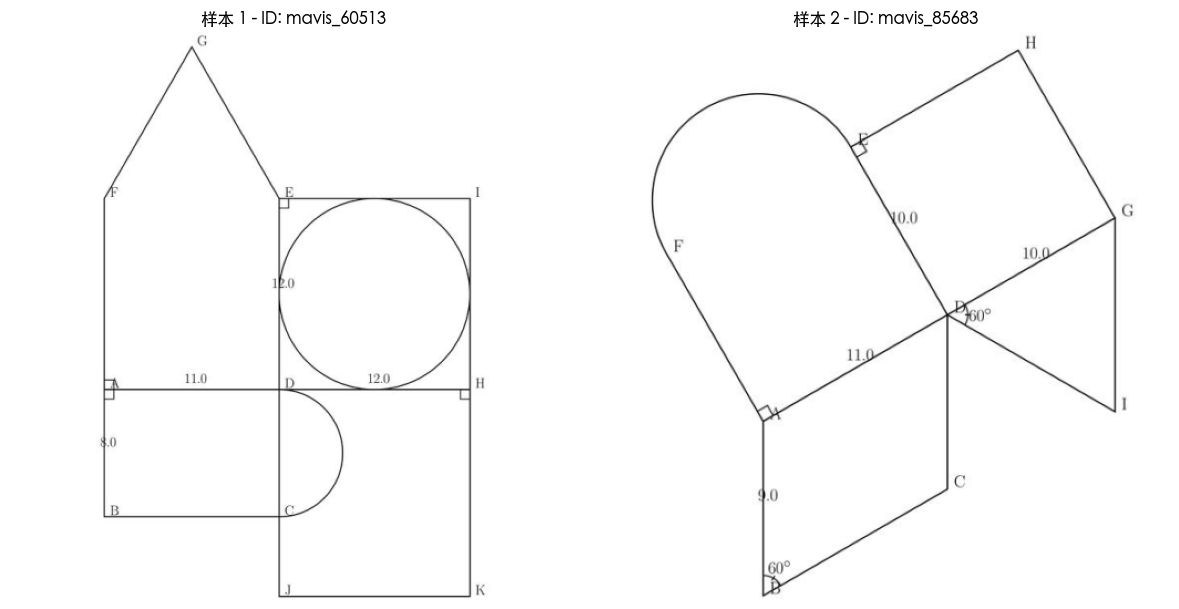

In [12]:
# 尝试显示图像样本
print("\n尝试显示图像样本:")
if 'df' in locals() and 'image' in df.columns:
    # 筛选出有图像的样本
    image_samples = df[df['image'].notnull()]
    
    if len(image_samples) > 0:
        sample_df = image_samples.sample(n=min(2, len(image_samples)), random_state=42)
        
        fig, axes = plt.subplots(1, min(2, len(sample_df)), figsize=(12, 6))
        if min(2, len(sample_df)) == 1:
            axes = [axes]
        
        for i in range(len(sample_df)):
            row = sample_df.iloc[i]
            if 'image' in row and row['image'] is not None:
                try:
                    # 从字节数据创建图像
                    if isinstance(row['image'], dict) and 'bytes' in row['image']:
                        image_bytes = row['image']['bytes']
                        image_buffer = BytesIO(image_bytes)
                        img = Image.open(image_buffer)
                        
                        # 显示图像
                        axes[i].imshow(img)
                        axes[i].set_title(f'样本 {i+1} - ID: {row["id"]}')
                        axes[i].axis('off')
                    else:
                        axes[i].text(0.5, 0.5, f'无法解析\n图像数据', 
                                    ha='center', va='center', transform=axes[i].transAxes)
                        axes[i].axis('off')
                except Exception as e:
                    axes[i].text(0.5, 0.5, f'无法显示\n图像\n错误: {str(e)[:30]}', 
                                ha='center', va='center', transform=axes[i].transAxes)
                    axes[i].axis('off')
            else:
                axes[i].text(0.5, 0.5, f'无图像数据\n样本 {i+1}', 
                            ha='center', va='center', transform=axes[i].transAxes)
                axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("数据集中没有可用的图像数据")

In [12]:
# 添加数据统计信息
print("\n数据统计信息:")
print("="*50)
if 'df' in locals():
    print(f"总样本数: {len(df)}")
    
    # Caption长度统计
    if 'caption' in df.columns:
        df['caption_length'] = df['caption'].str.len()
        print(f"\nCaption长度统计:")
        print(f"  平均长度: {df['caption_length'].mean():.2f} 字符")
        print(f"  最小长度: {df['caption_length'].min()} 字符")
        print(f"  最大长度: {df['caption_length'].max()} 字符")
        print(f"  长度中位数: {df['caption_length'].median()} 字符")
    
    # Code长度统计
    if 'code' in df.columns:
        df['code_length'] = df['code'].str.len()
        print(f"\nCode长度统计:")
        print(f"  平均长度: {df['code_length'].mean():.2f} 字符")
        print(f"  最小长度: {df['code_length'].min()} 字符")
        print(f"  最大长度: {df['code_length'].max()} 字符")
        print(f"  长度中位数: {df['code_length'].median()} 字符")
    
    # 图像数据统计
    if 'image' in df.columns:
        # 统计有图像数据的样本数
        has_image = df['image'].apply(lambda x: x is not None and not (isinstance(x, (list, np.ndarray)) and len(x) == 0))
        count_with_image = has_image.sum()
        print(f"\n图像数据统计:")
        print(f"  有图像数据的样本数: {count_with_image}")
        print(f"  无图像数据的样本数: {len(df) - count_with_image}")
        print(f"  图像数据覆盖率: {count_with_image/len(df)*100:.2f}%")

print("="*50)
print("分析完成")


数据统计信息:
总样本数: 6579

Caption长度统计:
  平均长度: 340.91 字符
  最小长度: 25 字符
  最大长度: 916 字符
  长度中位数: 326.0 字符

Code长度统计:
  平均长度: 0.00 字符
  最小长度: 0 字符
  最大长度: 0 字符
  长度中位数: 0.0 字符

图像数据统计:
  有图像数据的样本数: 6579
  无图像数据的样本数: 0
  图像数据覆盖率: 100.00%
分析完成
